In [101]:
# Add matplotlib inline magic command
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [102]:
# Files to load
housing_data = "housing.csv"

In [103]:
# Read the data file and store it in a Pandas DataFrame.
housing_data_df = pd.read_csv(housing_data)
housing_data_df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [104]:
# Drop columns not useful to our analysis
housing_data_df = housing_data_df.drop(columns=["url", "region_url", "image_url", "description", "lat", "long", "state"])
housing_data_df.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
4,7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN


In [105]:
# Determine number of rows with data for each column
housing_data_df.count()

id                         384977
region                     384977
price                      384977
type                       384977
sqfeet                     384977
beds                       384977
baths                      384977
cats_allowed               384977
dogs_allowed               384977
smoking_allowed            384977
wheelchair_access          384977
electric_vehicle_charge    384977
comes_furnished            384977
laundry_options            305951
parking_options            244290
dtype: int64

In [106]:
# Determine number of rows with missing data for each column
housing_data_df.isnull().sum()

id                              0
region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
dtype: int64

In [107]:
# Drop rows where 'laundry_options' is empty and then check to how many empty rows left in df
housing_data_df = housing_data_df.dropna(axis=0, subset=['laundry_options'])
housing_data_df.isnull().sum()

id                             0
region                         0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options                0
parking_options            69071
dtype: int64

In [108]:
# Drop rows where 'parking_options' is empty and then make sure there are no more empty rows
housing_data_df = housing_data_df.dropna(axis=0, subset=['parking_options'])
housing_data_df.isnull().sum()

id                         0
region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
dtype: int64

In [109]:
# Drop duplicates
housing_data_df = housing_data_df.drop_duplicates()
housing_data_df.duplicated()

0         False
1         False
2         False
3         False
6         False
          ...  
384970    False
384972    False
384974    False
384975    False
384976    False
Length: 236880, dtype: bool

In [110]:
# Check data types
housing_data_df.dtypes

id                           int64
region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
dtype: object

# Price column

In [111]:
# Get summary stats
housing_data_df['price'].describe()

count    2.368800e+05
mean     1.346506e+04
std      5.688328e+06
min      0.000000e+00
25%      8.190000e+02
50%      1.060000e+03
75%      1.465000e+03
max      2.768307e+09
Name: price, dtype: float64

In [112]:
# Get the number listings at each price point
price_count = housing_data_df.groupby(["price"]).count()["id"]
price_count

price
0             908
1             327
2               1
5              17
8               3
             ... 
9001300         1
10321189        1
11621360        1
18502000        2
2768307249      1
Name: id, Length: 3528, dtype: int64

In [113]:
# Establish bins.
size_bins = [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 300000000]
group_names = ["0-500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000", "3000-3500", "3500-4000", "4000-4500", "4500-5000", "5000-5500", "5500-6000", "6000-6500", "6500-7000", "7000-7500", "7500-8000", "8000-8500", "8500-9000", "9000-9500", "9500-10000", "10000-10500", "10500-11000", "11000-11500", "11500-12000", "12000-12500", "12500-13000", "13000-13500", "13500-14000", "14000-14500", "14500-15000", "15000-15500", "15500-16000", "16000-16500", "16500-17000", "17000-17500", "17500-18000", "18000-18500", "18500-19000", "19000-19500", "19500-20000", ">20000"]

In [114]:
# Add Bin column to dataframe
housing_data_df["Bin"] = pd.cut(housing_data_df["price"], size_bins, labels=group_names)
housing_data_df.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000


In [115]:
# Count how many listings fall within each price range
price_bins = housing_data_df.groupby(["Bin"]).count()["id"]
price_bins

Bin
0-500            6618
500-1000       102040
1000-1500       74893
1500-2000       32769
2000-2500       11074
2500-3000        5084
3000-3500        2007
3500-4000         996
4000-4500         459
4500-5000         243
5000-5500         181
5500-6000         122
6000-6500          61
6500-7000          40
7000-7500          20
7500-8000          22
8000-8500          15
8500-9000          16
9000-9500           8
9500-10000         12
10000-10500         3
10500-11000         7
11000-11500        10
11500-12000         6
12000-12500         3
12500-13000         3
13000-13500         3
13500-14000         5
14000-14500         0
14500-15000         5
15000-15500         0
15500-16000         7
16000-16500         2
16500-17000         1
17000-17500         5
17500-18000         0
18000-18500         2
18500-19000         1
19000-19500         0
19500-20000         2
>20000            134
Name: id, dtype: int64

In [116]:
# Convert to df
price_bins_df = pd.DataFrame(price_bins).reset_index()
price_bins_df = price_bins_df.rename(columns={"id":"count"})
price_bins_df.head(5)

,Bin,count
0,0-500,6618
1,500-1000,102040
2,1000-1500,74893
3,1500-2000,32769
4,2000-2500,11074


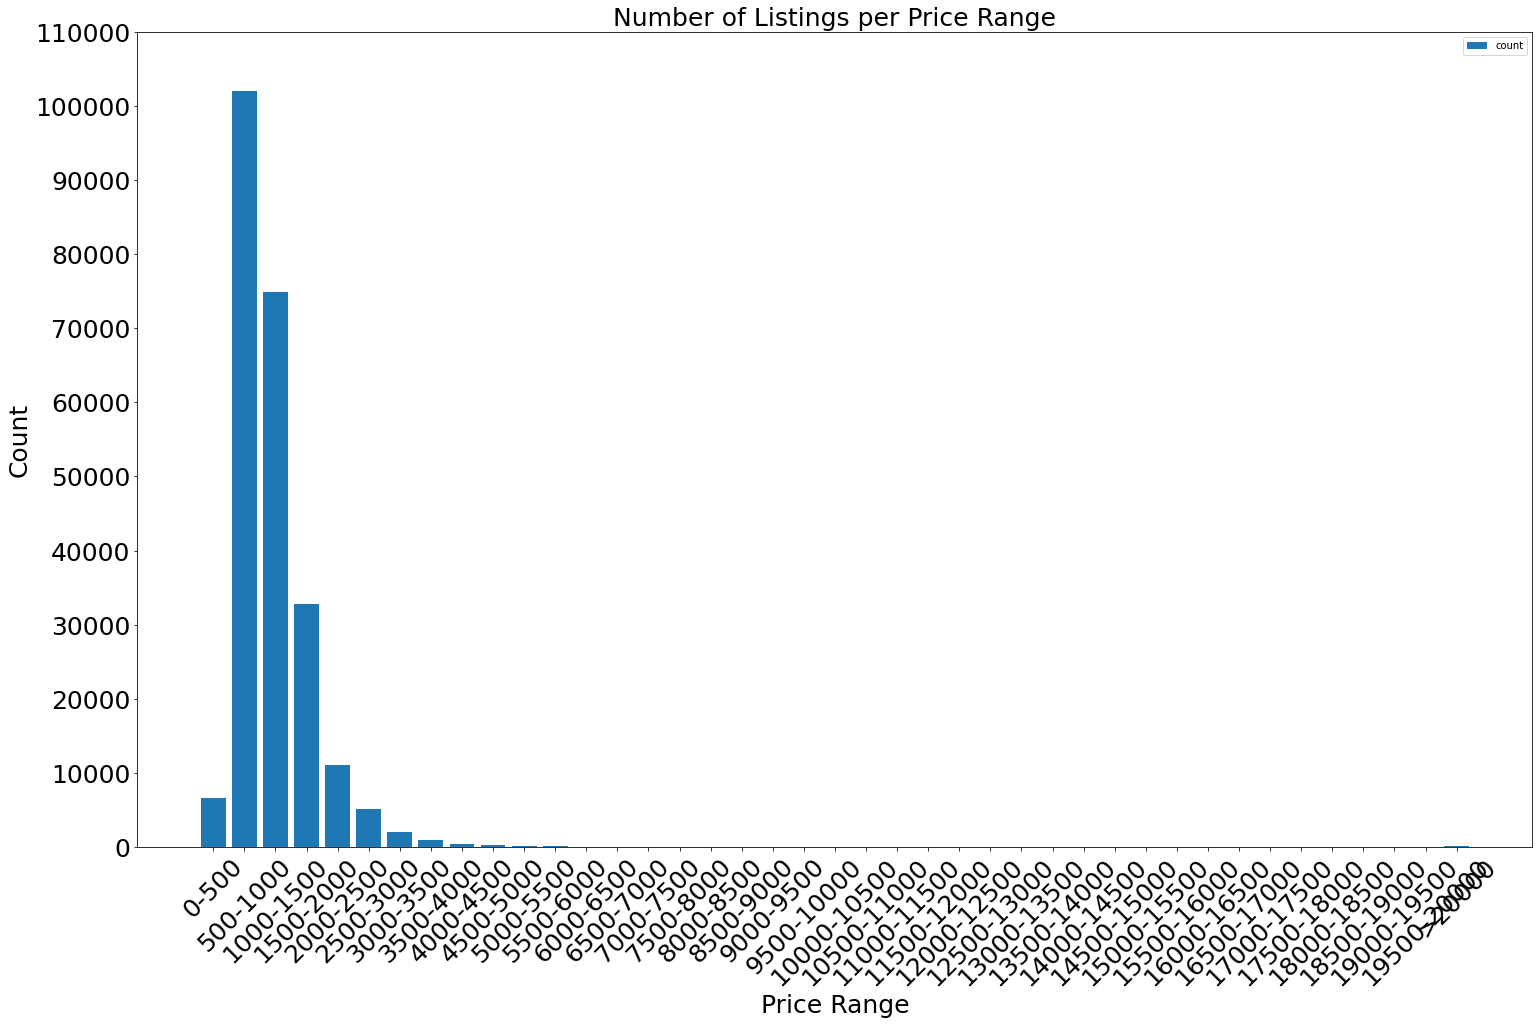

In [117]:
# Plot the number of listings within each price range
# Set the x-axis
x_axis = price_bins_df["Bin"]
y_axis = price_bins_df["count"]

# Create the plot and add a label for the legend.
plt.figure(figsize=(25,15))
plt.bar(x_axis, y_axis, label='count')

# Create labels for the x and y axes.
plt.xlabel("Price Range", fontsize=25)
plt.ylabel("Count", fontsize=25)

plt.xticks(fontsize=25, rotation=(45))
plt.yticks(np.arange(0, 120000,step=10000), fontsize=25)

# Create a title.
plt.title("Number of Listings per Price Range", fontsize=25)
# Add the legend.
plt.legend()

In [118]:
# Filter for homes with rent between 500 and 6000
housing_data_drop_price = housing_data_df.loc[(housing_data_df["price"].between(500, 6000, inclusive=True))]
housing_data_drop_price.head()

/var/folders/ws/6frgtryj7x982nkkh6kmz_gm0000gn/T/ipykernel_25622/482207887.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  housing_data_drop_price = housing_data_df.loc[(housing_data_df["price"].between(500, 6000, inclusive=True))]


,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000


In [119]:
# Check that filter kept correct price range
housing_data_drop_price.groupby(["price"]).count()["id"]


price
500     603
501       3
502       2
503       4
504       2
       ... 
5985      1
5995      3
5998      1
5999      3
6000     48
Name: id, Length: 3085, dtype: int64

## Sqft Column

In [120]:
# Get summary stats
housing_data_drop_price['sqfeet'].describe()

count    2.304710e+05
mean     1.101985e+03
std      2.447301e+04
min      0.000000e+00
25%      7.510000e+02
50%      9.500000e+02
75%      1.156000e+03
max      8.388607e+06
Name: sqfeet, dtype: float64

In [121]:
# Get the number listings at each sqft.
sqft_count = housing_data_drop_price.groupby(["sqfeet"]).count()["id"]
sqft_count

sqfeet
0          42
1          31
2          17
3           1
5           4
           ..
99202       1
775814      1
999999      3
8000000     1
8388607     1
Name: id, Length: 2949, dtype: int64

In [122]:
# Convert to df
sqft_df = pd.DataFrame(sqft_count).reset_index()
sqft_df = sqft_df.rename(columns={"id":"count"})
sqft_df

,sqfeet,count
0,0,42
1,1,31
2,2,17
3,3,1
4,5,4
...,...,...
2944,99202,1
2945,775814,1
2946,999999,3
2947,8000000,1


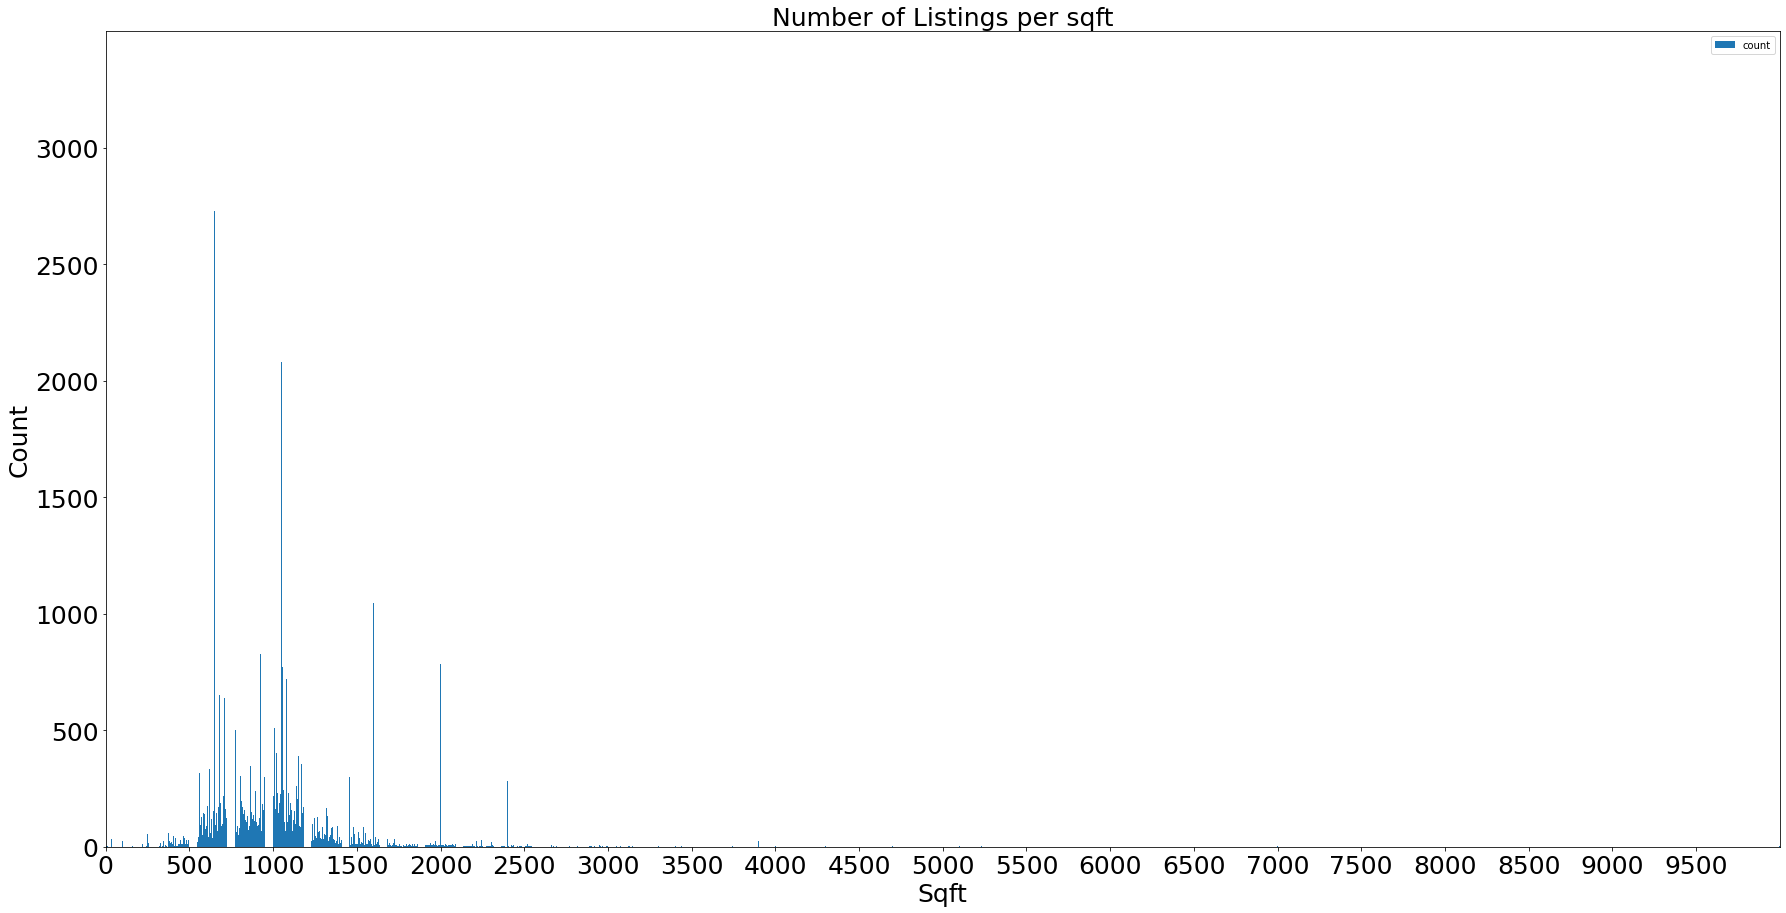

In [123]:
# Set the x-axis
x_axis = sqft_df["sqfeet"]
y_axis = sqft_df["count"]

# Create the plot and add a label for the legend.
plt.figure(figsize=(30,15))
plt.bar(x_axis, y_axis, label='count')

# Create labels for the x and y axes.
plt.xlabel("Sqft", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.xlim(0, 10000)
plt.ylim(0, 3500)
plt.xticks(np.arange(0, 10000,step=500), fontsize=25)
plt.yticks(np.arange(0, 3500,step=500), fontsize=25)
# Create a title.
plt.title("Number of Listings per sqft", fontsize=25)

# Add the legend.
plt.legend()

In [124]:
# Filter for homes between 250 and 2500 sqft
housing_data_drop_sqft = housing_data_drop_price.loc[(housing_data_drop_price["sqfeet"].between(250, 2500, inclusive=True))]
housing_data_drop_sqft.head()

/var/folders/ws/6frgtryj7x982nkkh6kmz_gm0000gn/T/ipykernel_25622/935416965.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  housing_data_drop_sqft = housing_data_drop_price.loc[(housing_data_drop_price["sqfeet"].between(250, 2500, inclusive=True))]


,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000


## Beds Column

In [125]:
# Get the number listings for each sqft.
bed_count = housing_data_drop_sqft.groupby(["beds"]).count()["id"]
bed_count

beds
0         6240
1        65645
2       107737
3        41031
4         6006
5          585
6           71
7            9
8            6
1100         2
Name: id, dtype: int64

In [126]:
# Drop row with 1100 beds
housing_data_drop_beds = housing_data_drop_sqft.loc[(housing_data_drop_sqft["beds"] != 1100)]
housing_data_drop_beds.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000


## Baths Column

In [127]:
# Get the number listings for each unique number of baths.
bath_count = housing_data_drop_beds.groupby(["baths"]).count()["id"]
bath_count

baths
0.0      1057
1.0    119169
1.5     17349
2.0     77502
2.5      8669
3.0      2542
3.5       482
4.0       467
4.5        50
5.0        25
5.5        13
6.0         5
Name: id, dtype: int64

In [128]:
# Drop rows with 0 bathrooms
housing_data_drop_bath = housing_data_drop_beds.loc[(housing_data_drop_sqft["baths"] != 0)]
housing_data_drop_bath.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000


In [129]:
housing_data_drop_bath.groupby(["baths"]).count()["id"]

baths
1.0    119169
1.5     17349
2.0     77502
2.5      8669
3.0      2542
3.5       482
4.0       467
4.5        50
5.0        25
5.5        13
6.0         5
Name: id, dtype: int64

## Type Column

In [130]:
# Get the unique values for type
housing_data_drop_bath["type"].unique()

array(['apartment', 'condo', 'duplex', 'house', 'townhouse',
       'manufactured', 'flat', 'loft', 'cottage/cabin', 'in-law', 'land',
       'assisted living'], dtype=object)

In [131]:
# Get the number listings for each type of home.
housing_data_drop_bath.groupby(["type"]).count()["id"]

# suggestions to drop everything except apartment, house and townhouse as there are not enough data points for the rest

type
apartment          179801
assisted living         1
condo                4515
cottage/cabin         539
duplex               4327
flat                  450
house               19809
in-law                134
land                    4
loft                  544
manufactured         3571
townhouse           12578
Name: id, dtype: int64

In [132]:
# Filter for just apartments, houses and townhouses
clean_housing_data = housing_data_drop_bath.loc[(housing_data_drop_sqft["type"] == "apartment") + (housing_data_drop_sqft["type"] == "house") + (housing_data_drop_sqft["type"] == "townhouse")]
clean_housing_data.head()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,Bin
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,1000-1500
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,1500-2000
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500
6,7049020738,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking,500-1000
7,7049041899,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,1000-1500


In [133]:
# Check that filter worked
clean_housing_data.groupby(["type"]).count()["id"]

type
apartment    179801
house         19809
townhouse     12578
Name: id, dtype: int64

In [134]:
# Save final dataframe, dropping 'id' and 'Bin' columns
clean_housing_data = clean_housing_data.drop(columns=["id", "Bin"]).reset_index(drop=True)
clean_housing_data.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport
1,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage
2,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport
3,reno / tahoe,935,apartment,661,1,1.0,1,1,1,0,0,0,laundry on site,off-street parking
4,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport


## Export to csv

In [135]:
# export clean file to csv
clean_housing_data.to_csv("clean_housing_data.csv")